In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

<h3>Кармазин Василий ПИН-43</h3>
<br><br>
<center>
    <h1>Лабораторная работа №3</h1>
    <h2>Противоракетная оборона</h2>
</center>

<h3>Задание:</h3>
«Противник» производит пуск ракеты класса "земля-земля" из т. А со скоростью $v_0 = 1000$ м/c  под углом $\dfrac{\pi}{4}$  по цели в т. Д, расположенной на Вашей территории (расстояние L между тт. А и Д можно рассчитать). Старт мгновенно фиксируется со спутника и после принятия решения о противодействии начинается телеметрия траектории ракеты. Ежесекундно измеряются (к сожалению, с неизбежными ошибками) координаты траектории движения ракеты на пассивном участке траектории с 15-й по 40-ю секунды полета. Полученные данные обрабатываются для получения уравнения движения ракеты. Одна антиракета должна стартовать из т. С, расположенной на расстоянии 0.75 $L$ от т. А (или 0.25 $L$ от т. Д) не позднее, чем ракета пройдет через максимальную по высоте
точку своей траектории) и поразить ракету в полете, другая антиракета из этой же т. С должна накрыть пусковую площадку противника (оцененное по измерениям положение т. А). Стартовая скорость антиракеты $v_1 = 2000$ м/c, а угол старта и момент старта Вам необходимо определить. Примем радиус поражения ракеты 2500 м., ошибку измерений 0.01.

<center>
    <h3>1 Моделирование.</h3>
</center>

<h4>Описание модели:</h4>

В данной модели мы предполагаем, что: 
- Двигатели ракеты отработали на старте, и она движется по баллистической траектории
- Ракету будем рассматривать как материальную точку, а землю будем считать плоской
- На ракету действует только сила тяжести

<h4>Дано:</h4>

- $v_0 = 1000$ мс, стартовая скорость ракеты противника;
- $v_1 = 2000$ мс, стартовая скорость антиракеты;
- $\alpha = \dfrac{\pi}{4}$, угол запуска ракеты противника;
- $δ = 0.01$, ошибка определения траектории ракеты противника
- $g = 9.8$ $м/c2$, ускорение свободного падения

In [2]:
v_0 = 1000
v_1 = 2000
alpha = np.pi / 4
g = 9.8

- $β$, угол запуска антиракеты
- $t$, время
- $t_0$, время старта антиракеты
- $y(t)$, вертикальная составляющая движения
- $x(t)$, горизонтальная составляющая движения

<h4>Построение модели ракеты противника:</h4>

Уравнения движения тела

<center>
$\begin{cases}
    v_x(t) = v_0 \cos{(\alpha)} \\
    v_y(t) = v_0 \sin{(\alpha)} - gt
\end{cases}$
</center>

Интегрируем по $t$
<center>
$\begin{cases}
    x(t) = v_0 \cos{(\alpha)}t \\
    y(t) = v_0 \sin{(\alpha)}t - \dfrac{gt^2}{2}
\end{cases}$
</center>

Максимальная высота достигается при $v_y(t) = 0$

<center>
$T_1 = \dfrac{v_0\sin{(\alpha)}}{g}$, время, за которое ракета достигает максимальной высоты
</center>

<center>
$T_2 = \dfrac{2v_0\sin{(\alpha)}}{g}$, время, за которое ракета достигает цели
</center>

Зная $T_2$ можем узнать дальность полёта $L$

<center>
$L = \dfrac{2{v_0}^2\cos{(\alpha)}\sin{(\alpha)}}{g}$
</center>

In [3]:
def x(t):
    return v_0*np.cos(alpha)*t

def y(t):
    return v_0*np.sin(alpha)*t-g*t**2/2
    
T_1 = v_0*np.sin(alpha)/g
T_2 = 2*v_0*np.sin(alpha)/g
L = 2*v_0**2*np.sin(alpha)*np.cos(alpha)/g
print(T_1, T_2, L)

72.15375318230075 144.3075063646015 102040.8163265306


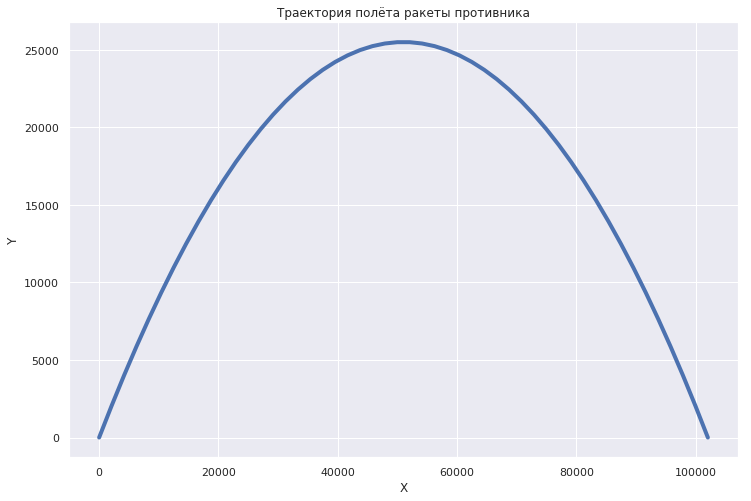

In [4]:
ts = np.linspace(0, T_2)

plt.figure(figsize=(12,8))
plt.plot(x(ts), y(ts), linewidth=4);
plt.title('Траектория полёта ракеты противника')
plt.xlabel('X')
plt.ylabel('Y');

<h4>Телеметрия траектории ракеты противника:</h4>

Спутник ежесекундно отслеживает полёт ракеты начиная с 10-й по 40-ю секунды.

Пусть δ, ошибка определения траектории ракеты противника $= 0.05$


In [5]:
err = 0.05

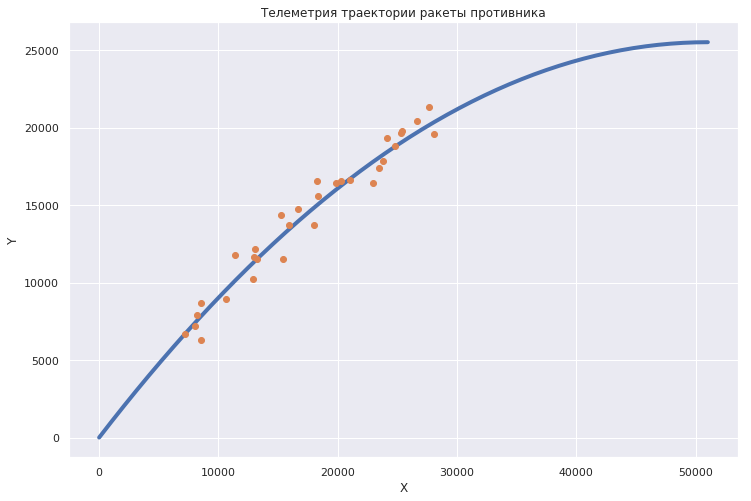

In [6]:
ts = np.linspace(0, T_1)

plt.figure(figsize=(12,8))
plt.plot(x(ts), y(ts), linewidth=4);

np.random.seed(1)
sputnik_ts = np.arange(10, 41)
x_sputnik = x(sputnik_ts)
x_sputnik += np.random.normal(0, err*x_sputnik.mean(), len(sputnik_ts))
y_sputnik = y(sputnik_ts)
y_sputnik += np.random.normal(0, err*y_sputnik.mean(), len(sputnik_ts))
plt.plot(x_sputnik, y_sputnik, 
         linestyle = 'None', linewidth=4, marker='o');
plt.title('Телеметрия траектории ракеты противника')
plt.xlabel('X')
plt.ylabel('Y');

По экспериментальным точкам будем определять траекторию ракеты. 

Считаем, что траектория строится по уравнению $y = ax^2 + bx + c$

Для восстановления траектории воспользуемся методом наименьших квадратов

<center>
    $Err = \sum_{i=0}^n |(a{x_i}^2 + b{x_i} + c) - y_i|^2 \rightarrow min$
</center>

In [7]:
coeffs = np.polyfit(x_sputnik, y_sputnik, 2)
coeffs

array([-1.07476040e-05,  1.04358895e+00, -2.99636168e+02])

In [8]:
def reg(coeffs, x):
    return coeffs.dot(np.array([x**2, x, 1]))

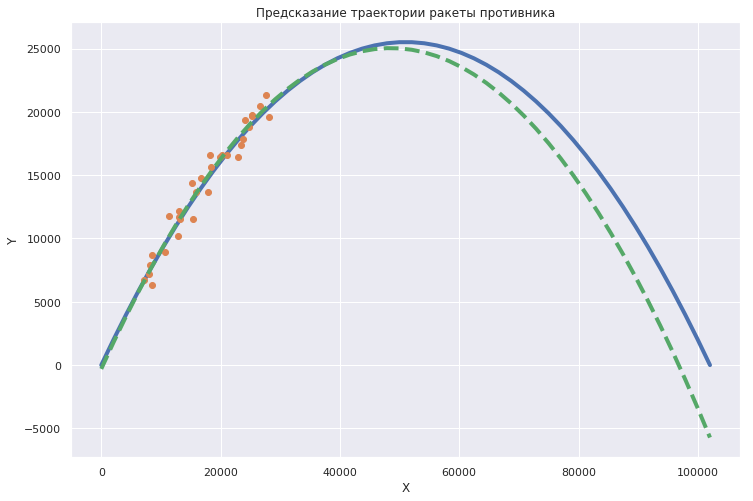

In [9]:
ts = np.linspace(0, T_2)

plt.figure(figsize=(12,8))
plt.plot(x(ts), y(ts), linewidth=4);

plt.plot(x_sputnik, y_sputnik, 
         linestyle='None', linewidth=4, marker='o');

plt.plot(x(ts), reg(coeffs, x(ts)), linestyle='--', linewidth=4);

plt.title('Предсказание траектории ракеты противника')
plt.xlabel('X')
plt.ylabel('Y');

In [10]:
roots = np.roots(coeffs)
roots

array([96811.70907366,   287.97493591])

In [11]:
print(f'Абсолютная ошибка: {abs(roots[0] - L)}')
print(f'Среднеквадратическая ошибка: {(roots[0] - L)**2}')

Абсолютная ошибка: 5229.107252871123
Среднеквадратическая ошибка: 27343562.66202938


<h4>Определение времени старта и угла старта первой антиракеты</h4>

Ракета стартует в некоторый момент времени $t_0$ из т. С на расстоянии $0.75L$ от стартовой площадки противника со скоростью $v_1 = 2000$ м/c под углом $\beta$ к горизонту.

Пусть $t_0$ = 40 c, те после построения траектории вражеской ракеты

In [12]:
t_0 = 40

Уравнения движения антиракеты
<center>
$\begin{cases}
    x_a(t) = 0.75L - v_1\cos{(\beta)}(t - t_0) \\
    y_a(t) = v_1 \sin{(\beta)}(t - t_0) - \dfrac{g(t - t_0)^2}{2}
\end{cases}$
</center>

Исключим $t-t_0$ из системы
<center>
$t-t_0 = \dfrac{0.75L - x_a(t)}{v_1 \cos{\beta}}$
</center>

<center>
$y_a(t) = \tan{\beta} * (0.75L - x_a(t)) - \dfrac{g}{2}\left(\dfrac{0.75L - x_a(t)}{v_1\cos{\beta}}\right) ^2$
</center>

<b>Будем подбивать ракету в верхней точке траектории</b>

$a, b, c$ - предсказанные коэффициенты траектории вражеской ракеты 
<center>
    $x_e = -\dfrac{b}{2a}$
</center>

Тогда вертикальная координата 

<center>
    $y_e = a{x_e}^2 + b{x_e} + c = c -\dfrac{b^2}{4a}$
</center>

Подставим координаты взрыва антиракеты в уравнение 

<center>
$c -\dfrac{b^2}{4a} = \tan{\beta} * (0.75L + \dfrac{b}{2a}) - \dfrac{g}{2}\left(\dfrac{0.75L + \dfrac{b}{2a}}{v_1\cos{\beta}}\right) ^2$
</center>

Выразим угол $\beta$ и узнаем время запуска $t_0$

<center>
$\beta = \dfrac{1}{2} 
\left[ 
    \arcsin{\left( \dfrac{B}{\sqrt{A^2+B^2}} \right)}
 +
    \arcsin{\left( \dfrac{C}{\sqrt{A^2+B^2}} \right)}
\right]$
</center>

Где $A,B,C$


<center>$A = 0.75L + \dfrac{b}{2a}$</center>
<center>$B = c - \dfrac{b^2}{4a}$</center>
<center>
    $C = \dfrac{g}{{v_1}^2}\left( 
        0.75L + \dfrac{b}{2a}
    \right)^2 + \left( 
        c - \dfrac{b^2}{4a}
    \right) = \dfrac{g}{{v_1}^2}A^2+B
    $
</center>

In [13]:
a, b, c = coeffs

A = 0.75*L
B = c - b**2/(2*a)
C = g/v_1**2 * A**2 + B
beta = 1/2 * (
    np.arcsin(B/np.sqrt(A**2 + B**2)) 
    + np.arcsin(C/np.sqrt(A**2 + B**2))
)

In [14]:
def x_a(angle, t):
    return 0.75*L - v_1*np.cos(angle)*(t - t_0)

def y_a(angle, t):
    return v_1*np.sin(angle)*(t-t_0)-g*(t-t_0)**2/2

<center>
$\begin{cases}
    roots[1] = 0.75L - v_1\cos{(\beta)}(t - t_0) \\
    0 = v_1 \sin{(\beta)}(t - t_0) - \dfrac{g(t - t_0)^2}{2}
\end{cases}$
</center>

<center>
$t-t_0 = \dfrac{0.75L - roots[1]}{v_1 \cos{\beta}}$
</center>

<b>Подберём $\beta$ вражеской базы</b>

<center>
    $x_e = roots[1]$
</center>

<center>
    $y_e = a{x_e}^2 + b{x_e} + c = 0$
</center>    

Подставляя получим 

<center>
$
\gamma = \dfrac{1}{2} \arcsin{\left( 
    \dfrac{g(0.75L - roots[1])}{{v_1}^2}
\right)}
$
</center>

In [15]:
A = 0.75*L - roots[1]
C = g/v_1**2
gamma = 1/2 * (
    np.arcsin(A*C) 
)

<IPython.core.display.Javascript object>


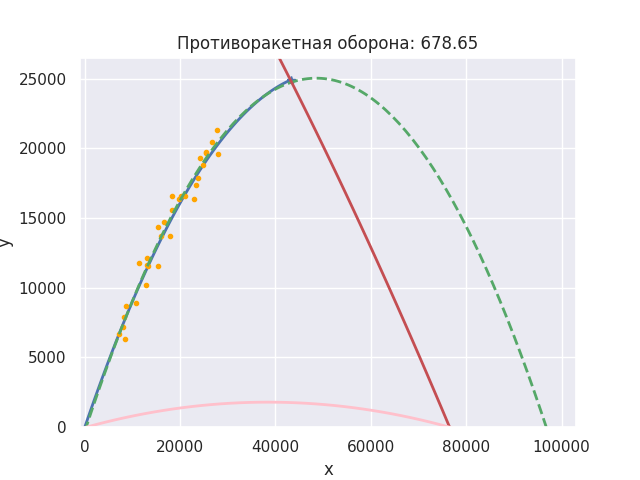

In [16]:
%matplotlib notebook
ts = np.linspace(0, T_2, len(np.arange(T_2)))
fig = plt.figure()
ax = fig.add_subplot(111)
padding = 1000

def update():
    ax.cla()
    ax.set_title('Противоракетная оборона')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xlim(-padding, x(T_2)+padding)
    ax.set_ylim(0, y(T_2/2)+padding)

def enemy_trajectory(i):
    ax.plot(x(ts[:i+1]), y(ts[:i+1]), linewidth=2, color='b')
    ax.plot(x(ts[i]), y(ts[i]), marker='*', color='b')
    return x(ts[i+1]), y(ts[i+1])

def targeting(i):
    if i < 10:
        pass
    else:
        ax.plot(x_sputnik[:i-9], y_sputnik[:i-9], color='orange',
                linestyle = 'None', linewidth=1, marker='o', markersize=3);
        coeffs = np.polyfit(x_sputnik[:i-9], y_sputnik[:i-9], 2)
        plt.plot(x(ts), reg(coeffs, x(ts)), color='g',
                 linestyle='--', linewidth=2);

def antirocket(i):
    if i < t_0:
        pass
    else:
        ax.plot(x_a(beta, ts[:i+1]), y_a(beta, ts[:i+1]),linewidth=2, color='r')
        ax.plot(x_a(beta, ts[i]), y_a(beta, ts[i]), marker='*', color='r')
        return x_a(beta, ts[i+1]), y_a(beta, ts[i+1])
    return 0, 0

def antirocket_base(i):
    if i < t_0:
        pass
    else:
        ax.plot(x_a(gamma, ts[:i+1]), y_a(gamma, ts[:i+1]),linewidth=2, color='pink')
        ax.plot(x_a(gamma, ts[i]), y_a(gamma, ts[i]), marker='*', color='pink')
        return x_a(gamma, ts[i+1]), y_a(gamma, ts[i+1])
    return 0, 0

prev_close = np.inf
done = 0
for i in range(len(ts[:-40])):
    update()
    if done:
        x_r, y_r = enemy_trajectory(done)
    else:
        x_r, y_r = enemy_trajectory(i)
    targeting(i)
    x_ar, y_ar = antirocket(i)
    x_arb, y_arb = antirocket_base(i)
    close = np.sqrt((abs(x_r - x_ar))**2 + (abs(y_r - y_ar))**2)
    ax.set_title(f'Противоракетная оборона: {prev_close:.2f}')
    
    if x_ar != 0:
        if close < prev_close:
            prev_close = close
        else:
            if not done:
                done = i

    fig.canvas.draw()

Противоракетная установка справилась с задачей, даже с погрешностью в 5%. Благодаря большому количеству наблюдений удалось хорошо предсказать траекторию вражеской ракеты